<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

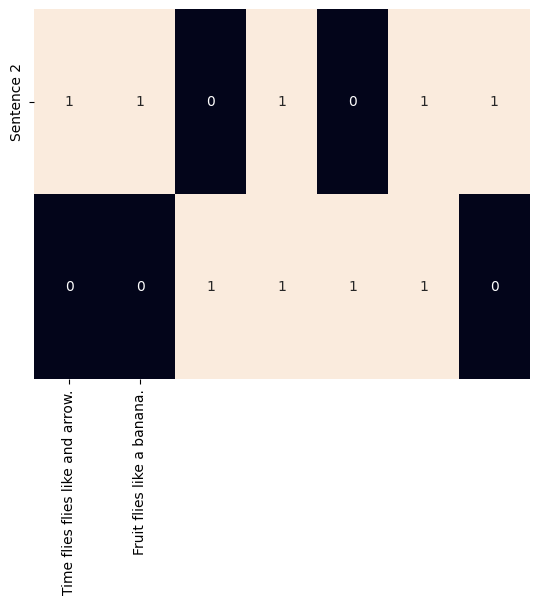

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ["Time flies flies like and arrow.",
          "Fruit flies like a banana."
          ]
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(one_hot,annot=True,cbar=False,xticklabels=corpus,yticklabels=["Sentence 2"])
